In [1]:
import matplotlib.pyplot as plt
import os
import xarray as xr

import pvdeg

import cartopy.crs as ccrs

In [14]:
conf = "03"
dir = f"/projects/inspire/PySAM-MAPS/CO-sample/{conf}/slices"

files = [os.path.join(dir, file) for file in os.listdir(dir) if file[-3:] == ".nc"]

files

['/projects/inspire/PySAM-MAPS/CO-sample/03/slices/03-quarter-res-718-1435.nc',
 '/projects/inspire/PySAM-MAPS/CO-sample/03/slices/03-quarter-res-0--1.nc',
 '/projects/inspire/PySAM-MAPS/CO-sample/03/slices/03-quarter-res-359-717.nc']

In [15]:
xr.open_mfdataset(files, engine="h5netcdf").to_netcdf(
    f"/projects/inspire/PySAM-MAPS/CO-sample/{conf}/1-16th-res-{conf}.nc",
    engine="h5netcdf",
)

In [8]:
ds = xr.open_dataset(
    "/projects/inspire/PySAM-MAPS/CO-sample/02/1-16th-res-02.nc", engine="h5netcdf"
)

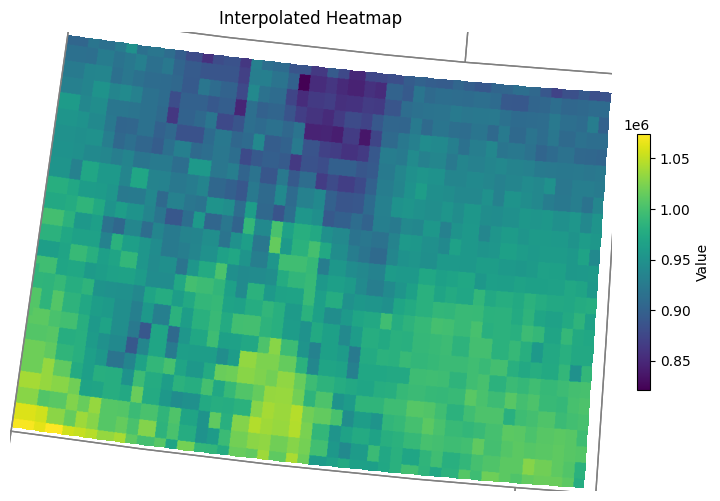

In [9]:
_, _ = pvdeg.geospatial.plot_sparse_analysis(
    ds.drop_dims(["time", "distance"]),
    data_var="annual_poa",
)

In [ ]:
first_day_ds = ds.drop_dims("distance").isel(time=slice(0, 24))

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(20, 30))

for i in range(24):
    ax = fig.add_subplot(6, 4, i + 1, projection=proj)
    ax.set_title(f"hour {i + 1}", fontsize=10)

    single_fig, single_ax = pvdeg.geospatial.plot_sparse_analysis(
        first_day_ds.isel(time=i), data_var="subarray1_poa_front", ax=ax
    )

    mappable = single_ax.images[0]


# Add a single colorbar for the entire figure
if mappable is not None:
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    fig.colorbar(mappable, cax=cbar_ax, label="Subarray 1 POA Front")